In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from pandas.tseries.offsets import DateOffset

csv_file_path = '/content/household_power_clean.csv'
df = pd.read_csv(csv_file_path)

# Convert the 'Date' column to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Select numeric columns only for forecasting
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Prepare a DataFrame to store all forecasts
forecasts_df = pd.DataFrame()

# Define the forecasting function using ARIMA
def forecast_series(series, steps):
    model = ARIMA(series, order=(1, 1, 1))  # Example order, adjust based on your data
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=steps)
    return forecast

# Calculate steps for 3 years assuming monthly data (36 months)
steps = 36

# Loop over each numeric column and perform forecasting
for column in numeric_cols:
    print(f"Forecasting {column}")
    try:
        series = df[column].dropna()
        forecasted_values = forecast_series(series, steps=steps)

        # Create a new time index for the forecasted period and append to forecasts_df
        last_date = series.index[-1]
        forecast_index = pd.date_range(start=last_date, periods=steps + 1, closed='right')
        forecasts_df = pd.concat([forecasts_df, pd.DataFrame(forecasted_values, index=forecast_index, columns=[column])], axis=1)
    except Exception as e:
        print(f"Error forecasting {column}: {e}")

# Assuming the forecasts DataFrame is not empty, save it to a new CSV file
if not forecasts_df.empty:
    forecasts_output_path = 'forecasted_values_extended.csv'
    forecasts_df.to_csv(forecasts_output_path)
    print(f"Forecasts saved to {forecasts_output_path}")
else:
    print("No forecasts generated.")


Forecasting Unnamed: 0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

Forecasting Global_active_power


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
<ipython-input-1-57311c86eb9f>:38: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_index = pd.date_range(start=last_date, periods=steps + 1, closed='right')
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/bas

Forecasting Global_reactive_power


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
<ipython-input-1-57311c86eb9f>:38: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_index = pd.date_range(start=last_date, periods=steps + 1, closed='right')
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/bas

Forecasting Voltage


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
<ipython-input-1-57311c86eb9f>:38: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_index = pd.date_range(start=last_date, periods=steps + 1, closed='right')
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/bas

Forecasting Global_intensity


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
<ipython-input-1-57311c86eb9f>:38: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_index = pd.date_range(start=last_date, periods=steps + 1, closed='right')
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/bas

Forecasting Sub_metering_1


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
<ipython-input-1-57311c86eb9f>:38: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_index = pd.date_range(start=last_date, periods=steps + 1, closed='right')
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/bas

Forecasting Sub_metering_2


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
<ipython-input-1-57311c86eb9f>:38: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_index = pd.date_range(start=last_date, periods=steps + 1, closed='right')
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/bas

Forecasting Sub_metering_3


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
<ipython-input-1-57311c86eb9f>:38: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_index = pd.date_range(start=last_date, periods=steps + 1, closed='right')
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/bas

Forecasting gap_monthly


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
<ipython-input-1-57311c86eb9f>:38: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_index = pd.date_range(start=last_date, periods=steps + 1, closed='right')
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWar

Forecasting grp_monthly


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
<ipython-input-1-57311c86eb9f>:38: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_index = pd.date_range(start=last_date, periods=steps + 1, closed='right')
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/bas

Forecasting v_monthly


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
<ipython-input-1-57311c86eb9f>:38: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_index = pd.date_range(start=last_date, periods=steps + 1, closed='right')
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/bas

Forecasting gi_monthly
Forecasts saved to forecasted_values_extended.csv


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
<ipython-input-1-57311c86eb9f>:38: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_index = pd.date_range(start=last_date, periods=steps + 1, closed='right')


In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the dataset
df = pd.read_csv('/content/household_power_clean.csv', parse_dates=['Date'], index_col='Date')
data = df[['Voltage', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Prepare input and output
X = data_scaled[:, 0].reshape(-1, 1)  # Voltage
Y = data_scaled[:, 1:]  # Submetering 1, 2, and 3

# Reshape input to [samples, time steps, features]
n_input = 1
n_features = 1
X_reshaped = X.reshape((X.shape[0], n_input, n_features))

# Define LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(n_input, n_features)),
    Dense(3)  # Predicting 3 outputs
])
model.compile(optimizer='adam', loss='mse')

# Split the dataset (keeping the last part for prediction)
split_idx = int(len(X_reshaped) * 0.8)
X_train, X_test = X_reshaped[:split_idx], X_reshaped[split_idx:]
Y_train, Y_test = Y[:split_idx], Y[split_idx:]

# Train the model
model.fit(X_train, Y_train, epochs=4, batch_size=64, verbose=1)

# Define the number of future steps to predict
future_steps = 36
last_known_voltage = X_reshaped[-n_input:].reshape((1, n_input, n_features))

# Initialize an empty list to store future predictions
future_predictions = []

# Predict future values
for _ in range(future_steps):
    next_prediction = model.predict(last_known_voltage)
    future_predictions.append(next_prediction[0])

# Generate future dates
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date, periods=future_steps + 1, freq='M')[1:]  # Skip the last known date

# Prepare future predictions for inverse scaling
future_predictions_array = np.array(future_predictions)
zeros_padding = np.zeros((future_predictions_array.shape[0], 1))
future_predictions_with_padding = np.concatenate([zeros_padding, future_predictions_array], axis=1)

# Inverse transform the predictions
future_predictions_scaled = scaler.inverse_transform(future_predictions_with_padding)

# Convert future predictions to DataFrame
future_predictions_df = pd.DataFrame(future_predictions_scaled, index=future_dates, columns=['Voltage_Placeholder', 'Predicted_Sub_metering_1', 'Predicted_Sub_metering_2', 'Predicted_Sub_metering_3'])

# Drop the placeholder column for Voltage as it's not needed in the output
future_predictions_df.drop(columns=['Voltage_Placeholder'], inplace=True)

# Save to CSV
future_predictions_csv_path = 'household_power_future_forecasted.csv'
future_predictions_df.to_csv(future_predictions_csv_path)

print(f"Future forecasts saved to {future_predictions_csv_path}")


Epoch 1/4
25616/25616 [==============================] - 77s 3ms/step - loss: 0.0262
Epoch 2/4
25616/25616 [==============================] - 78s 3ms/step - loss: 0.0260
Epoch 3/4
25616/25616 [==============================] - 76s 3ms/step - loss: 0.0260
Epoch 4/4
1/1 [==============================] - 0s 16ms/step
Future forecasts saved to household_power_future_forecasted.csv


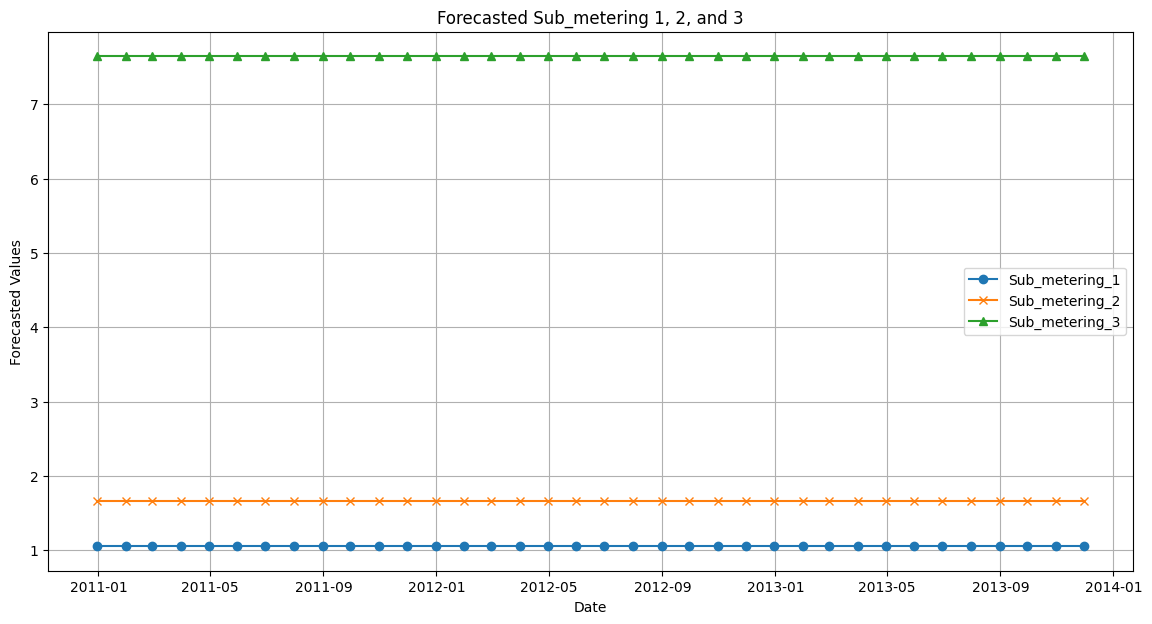

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the forecasted data from CSV
forecasted_df = pd.read_csv('household_power_future_forecasted.csv', index_col=0, parse_dates=True)

# Plotting
plt.figure(figsize=(14, 7))

plt.plot(forecasted_df['Predicted_Sub_metering_1'], label='Sub_metering_1', marker='o')
plt.plot(forecasted_df['Predicted_Sub_metering_2'], label='Sub_metering_2', marker='x')
plt.plot(forecasted_df['Predicted_Sub_metering_3'], label='Sub_metering_3', marker='^')

plt.title('Forecasted Sub_metering 1, 2, and 3')
plt.xlabel('Date')
plt.ylabel('Forecasted Values')
plt.legend()
plt.grid(True)

plt.show()